For question 1-a, the matrix is below:
[[ 0.   25.3  25.09  9.62  2.1   0.    0.    0.    0.    1.14  0.    0.
   0.86 11.85  7.25  2.34  0.    0.    0.    0.    0.    0.    4.25  4.5
   0.    0.    3.11  7.39  3.61  0.    0.  ]
 [25.3   0.   24.84  6.4   0.97  0.    0.    0.    0.    0.    0.    0.
   0.   11.92  6.58  0.    0.    0.    0.    0.    0.    0.    4.55  4.84
   0.    0.    3.27  7.73  3.82  0.    0.  ]
 [25.09 24.84  0.   12.48  3.96  3.27  2.52  2.1   0.    3.56  1.5   0.
   4.11 13.85  8.1   3.86  2.36  0.    1.33  1.09  2.24  0.    4.66  4.97
   0.    0.    3.32  7.63  3.9   1.    2.1 ]
 [ 9.62  6.4  12.48  0.   11.87  9.15  7.73  6.96  6.85 15.28  7.93  6.54
   9.84  7.15  4.1  10.64  7.32  2.32  5.19  7.84  5.09  3.51  3.21  3.35
   4.19  3.05  2.51  3.87  2.83  2.84  2.96]
 [ 2.1   0.97  3.96 11.87  0.    7.62  5.33  8.44  6.84  6.29  9.52  1.51
   6.4   1.77  0.89  5.48  7.29  1.2   6.71  5.92  2.84  1.26  0.84  0.85
   1.34  1.2   0.78  0.88  0.81  1.09  0.89]
 [ 

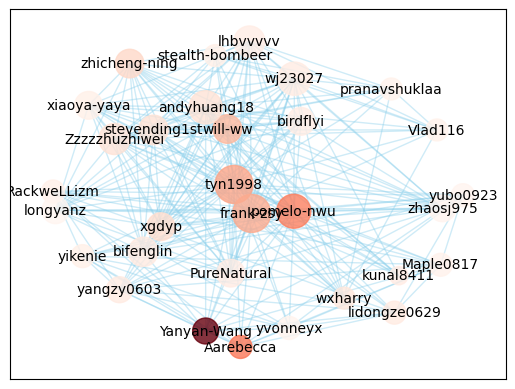

From this graph, it is clear that user Yanyan-Wang, pomelo-nwu, tyn1998 and frank-zsy have great influence, since they not only have noticeable large labels but also their labels have deeper color.


In [42]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

json_file_path='hw4_data.json' 
with open(json_file_path, 'r') as file:
    data=json.load(file)

nodes=data['nodes']
edges=data['edges']
node_id=[nodes[0] for nodes in nodes]
node_score=[nodes[1] for nodes in nodes]
node_index={nodes: i for i, nodes in enumerate(node_id)}
N=len(node_id)
matrix=np.zeros((N,N))
for edge in edges:
    node1, node2, weight=edge
    i, j=node_index[node1], node_index[node2]
    matrix[i][j]=weight
    matrix[j][i]=weight

#Question 1

print('For question 1-a, the matrix is below:')
print(matrix)
print()

direct_fri=[[]*N for _ in range(N)]
for i in range(N):
    for j in range(N):
        if i!=j and matrix[i][j]!=0:
            direct_fri[i].append(node_id[j])
print('For question 1-b, the list is below:')
for i in range(N):
    print('The direct friends of', node_id[i], 'are:', direct_fri[i])
print()
    
#Question 2

direct_fri_num=[0]*N
for i in range(N):
    direct_fri_num[i]=len(direct_fri[i])
direct_fri_num_sorted=sorted(direct_fri_num)
direct_fri_num_sorted.reverse()
node_id_copy=node_id.copy()
direct_fri_num_copy=direct_fri_num.copy()

print('The answer for question 2-a is below:')
for i in range(5):
    print(node_id_copy[direct_fri_num_copy.index(direct_fri_num_sorted[i])], 'ranks No.', i+1, 'with', direct_fri_num_sorted[i], 'direct friends.')
    node_id_copy[direct_fri_num.index(direct_fri_num_sorted[i])]=''
    direct_fri_num_copy[direct_fri_num_copy.index(direct_fri_num_sorted[i])]=-1
print()

node_score_sorted=sorted(node_score)
node_score_sorted.reverse()
node_id_copy=node_id.copy()

print('The answer for question 2-b is below:')
for i in range(5):
    print(node_id_copy[node_score.index(node_score_sorted[i])], 'ranks No.', i+1, 'with the score of', node_score_sorted[i], '.')
print()
    
effectiveness=[0]*N
for i in range(N):
    effectiveness[i]=node_score[i]*0.5+direct_fri_num[i]*0.5
effectiveness_sorted=sorted(effectiveness)
effectiveness_sorted.reverse()
node_id_copy=node_id.copy()

print('The answer for question 2-c is below:')
for i in range(5):
    print(node_id_copy[effectiveness.index(effectiveness_sorted[i])], 'ranks No.', i+1, 'with the effectiveness of', effectiveness_sorted[i], '.')
print('*The weight of effectiveness score and direct friends are both 50%.')
print()

#Question 3

sp_id=str(input('Enter the ID to be queried:'))
sp_index=node_id.index(sp_id)
shared_fri_num=[0]*N
for i in range(N):
    shared_fri_num[i]=len(set(direct_fri[sp_index])&set(direct_fri[i]))
shared_fri_num_sorted=sorted(shared_fri_num)
shared_fri_num_sorted.reverse()
node_id_copy=node_id.copy()

print('For question 3-a:')
for i in range(N):
    if direct_fri[sp_index].count(node_id_copy[shared_fri_num.index(shared_fri_num_sorted[i])])==0 and shared_fri_num.index(shared_fri_num_sorted[i])!=sp_index:
        print('The most likely user for', node_id_copy[sp_index], 'to become a new friend is:', node_id_copy[shared_fri_num.index(shared_fri_num_sorted[i])], ', since they have', shared_fri_num_sorted[i], 'shared friends.')
        break
print()

sp_edge=[0]*N
for i in range(N):
    sp_edge[i]=matrix[sp_index][i]
sp_edge_sorted=sorted(matrix[sp_index])
sp_edge_sorted.reverse()
node_id_copy=node_id.copy()

print('For question 3-b, the recommended list is below:')
for i in range(5):
    print('User', node_id_copy[sp_edge.index(sp_edge_sorted[i])], 'ranks No.', i+1, 'with the weight of', sp_edge_sorted[i], '.')
print()

#Question 4

print('For question 4-a & 4-b, the graph is below:')

G=nx.Graph()
for i in range(N):
    G.add_node(node_id[i], value=direct_fri_num[i])
for edge in data['edges']:
    G.add_edge(edge[0], edge[1], weight=edge[2])

pos=nx.spring_layout(G, k=4)
node_sizes=[v['value']*25 for k, v in G.nodes(data=True)]
node_colors=(node_score-np.min(node_score))/(np.max(node_score)-np.min(node_score))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.Reds, alpha=0.8)
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edges(G, pos, edge_color='skyblue', alpha=0.4)
plt.show()

print('From this graph, it is clear that user Yanyan-Wang, pomelo-nwu, tyn1998 and frank-zsy have great influence, since they not only have noticeable large labels but also their labels have deeper color.')